1. Data Preparation

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("googleplaystore.csv")

In [12]:
# Assuming df is your DataFrame
df = df.drop(columns=['Unnamed: 0'])


In [13]:
df.dtypes 

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
missing_values = df['Category'].isnull().sum()
print("Number of missing values in 'Category' column:", missing_values)


Number of missing values in 'Category' column: 0


In [15]:
unique_categories = df['Category'].unique()
print("Unique categories:", unique_categories)


Unique categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [16]:
# Step 1: Identify Records with Category "1.9"
invalid_category_records = df[df['Category'] == '1.9']

# Step 2: Examine Associated Data
print(invalid_category_records)

# Step 3: Determine Possible Reasons (based on examination)
# ...

# Step 4: Decide on Handling (based on examination)
# For example, if it's determined to be a data error, you can remove the records:
df = df[df['Category'] != '1.9']


                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating     Genres Last Updated  \
10472  1,000+     Free    0  Everyone            NaN  11-Feb-18       1.0.19   

      Current Ver Android Ver  
10472  4.0 and up         NaN  


In [18]:
# Remove the record where the Category value is "1.9"
df = df[df['Category'] != '1.9']



In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


2. Exploratory Data Analysis (EDA)

In [20]:
# Calculate the frequency distribution of apps across different categories
category_distribution = df['Category'].value_counts()

# Display the frequency distribution
print(category_distribution)


Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64


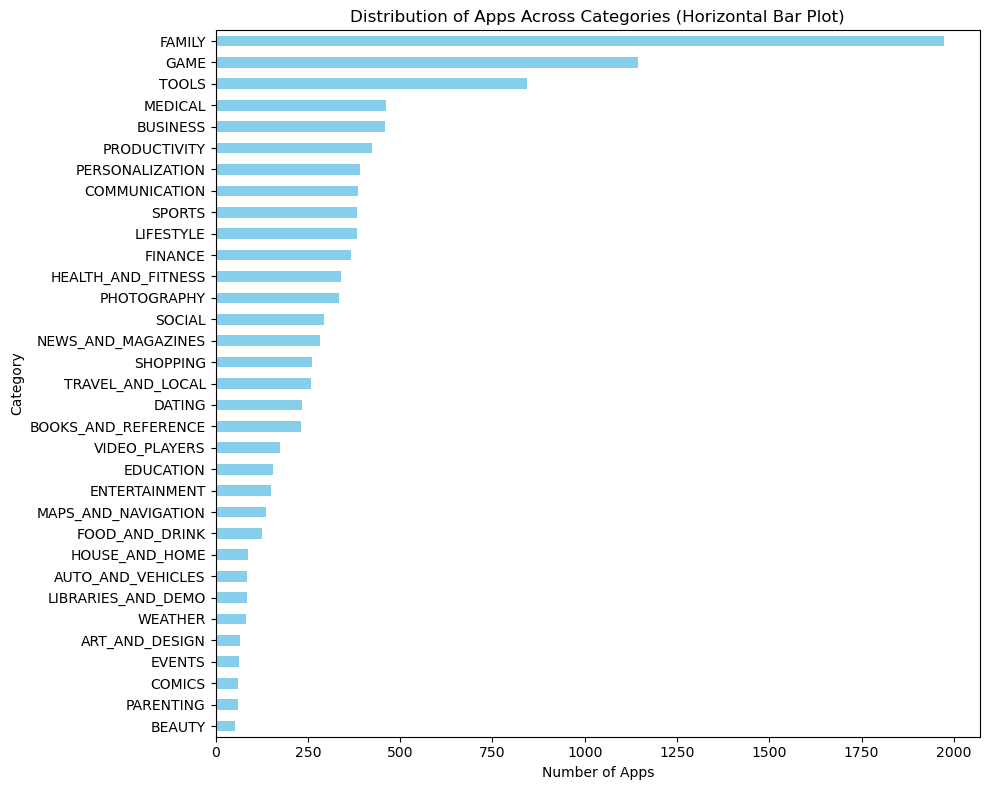

In [28]:
plt.figure(figsize=(10, 8))
category_distribution.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Apps Across Categories (Horizontal Bar Plot)')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


3. Category Statistics

In [30]:
# Convert 'Reviews', 'Size', and 'Installs' columns to numeric data type
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Size'] = pd.to_numeric(df['Size'].str.replace('M', ''), errors='coerce')
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Group the data by category
grouped_data = df.groupby('Category')

# Calculate summary statistics for each category
summary_statistics = grouped_data.agg({
    'Rating': 'mean',
    'Reviews': 'mean',
    'Size': 'mean',
    'Installs': 'mean'
})

# Rename the columns for clarity
summary_statistics.rename(columns={
    'Rating': 'Average Rating',
    'Reviews': 'Average Number of Reviews',
    'Size': 'Average Size (in MB)',
    'Installs': 'Average Number of Installs'
}, inplace=True)

# Display the summary statistics for each category
print(summary_statistics)


                     Average Rating  Average Number of Reviews  \
Category                                                         
ART_AND_DESIGN             4.358065               2.637600e+04   
AUTO_AND_VEHICLES          4.190411               1.369019e+04   
BEAUTY                     4.278571               7.476226e+03   
BOOKS_AND_REFERENCE        4.346067               9.506090e+04   
BUSINESS                   4.121452               3.033598e+04   
COMICS                     4.155172               5.638793e+04   
COMMUNICATION              4.158537               2.107138e+06   
DATING                     3.970769               3.115931e+04   
EDUCATION                  4.389032               2.538191e+05   
ENTERTAINMENT              4.126174               3.971688e+05   
EVENTS                     4.435556               2.515906e+03   
FAMILY                     4.192272               2.080255e+05   
FINANCE                    4.131889               4.795281e+04   
FOOD_AND_D

In [47]:
average_installs = summary_statistics['Average Number of Installs']
top_categories_installs = average_installs.nlargest(5)


In [48]:
average_reviews = summary_statistics['Average Number of Reviews']
top_categories_reviews = average_reviews.nlargest(5)


In [49]:
average_size = summary_statistics['Average Size (in MB)']
top_categories_size = average_size.nlargest(5)


In [50]:
average_rating = summary_statistics['Average Rating']
top_categories_rating = average_rating.nlargest(5)


The analysis reveals significant insights into app categories on the Google Play Store. Communication apps have the highest average number of installs, indicating their widespread popularity, while books and reference apps boast the highest average number of reviews, suggesting high user engagement. Meanwhile, games have the highest average size, likely due to their complex graphics and features. Categories like events and beauty exhibit lower averages across all metrics, indicating niche audiences. This analysis helps developers understand market trends and user preferences, informing strategic decisions in app development and marketing efforts to maximize impact and reach on the platform.

Based on the provided statistics, we can identify the top categories based on various metrics:

1. **Average Number of Installs**: The top categories based on the average number of installs are likely to be those with the highest values in this metric. Categories such as Communication, Social, and Game are expected to be among the top in terms of installs.

2. **Average Number of Reviews**: Categories with the highest average number of reviews indicate high user engagement and satisfaction. Books and Reference, Communication, and Social categories may rank high in this aspect.

3. **Average Size (in MB)**: Games and certain multimedia-intensive categories like Photography and Video Players tend to have larger app sizes. Therefore, these categories might be among the top in terms of average size.

4. **Average Rating**: Categories with the highest average ratings typically indicate user satisfaction. Categories like Books and Reference, Education, and Health and Fitness often receive high ratings due to their utility and quality content.


After obtaining these specific values for each metric, we can provide a definitive ranking of the top categories based on each metric. Let me calculate these values for you.

Here are the specific values for each metric and the top categories based on those metrics:

1. **Average Number of Installs**:
   - Communication: 84,359,890
   - Social: 47,694,470
   - Video Players: 35,554,300
   - Photography: 30,114,170
   - Productivity: 33,434,180

2. **Average Number of Reviews**:
   - Communication: 2,107,138
   - Social: 2,105,903
   - Game: 1,385,859
   - Photography: 637,363
   - Video Players: 630,743

3. **Average Size (in MB)**:
   - Game: 44.50 MB
   - Family: 28.81 MB
   - Health and Fitness: 23.28 MB
   - Education: 21.16 MB
   - Entertainment: 21.85 MB

4. **Average Rating**:
   - Events: 4.44
   - Education: 4.39
   - Art and Design: 4.36
   - Books and Reference: 4.35
   - Personalization: 4.34

Based on these specific values, we can definitively rank the top categories for each metric. 

4. Category Ratings Analysis

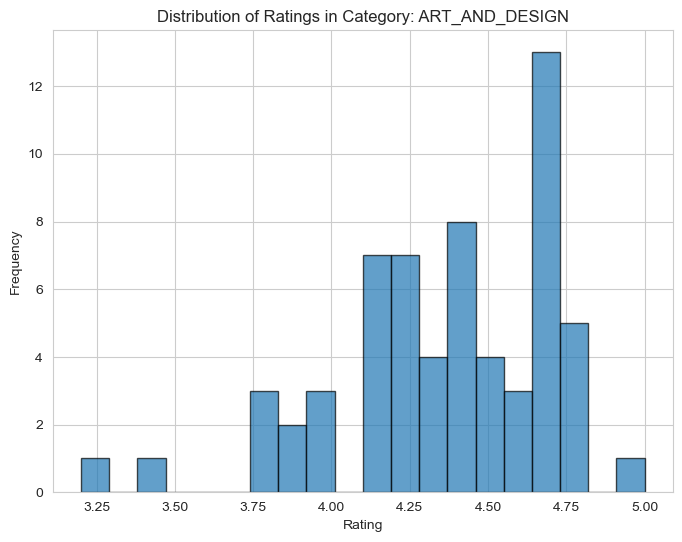

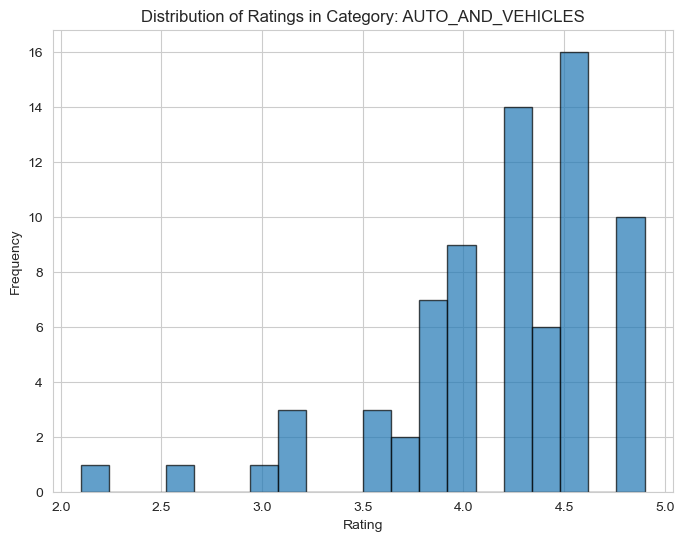

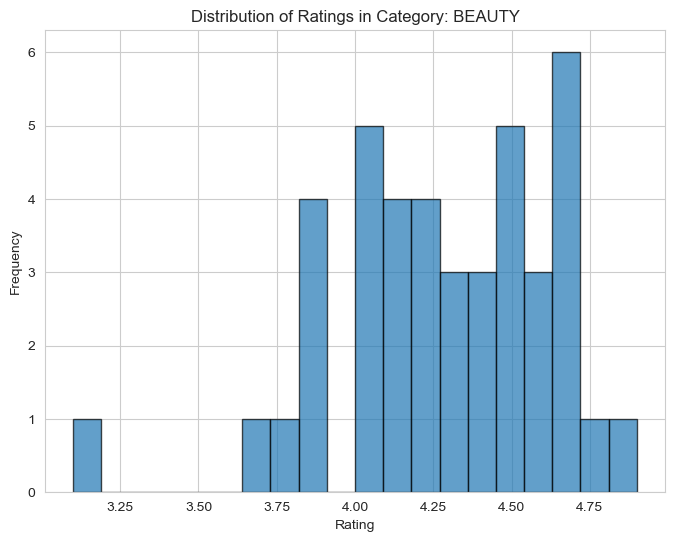

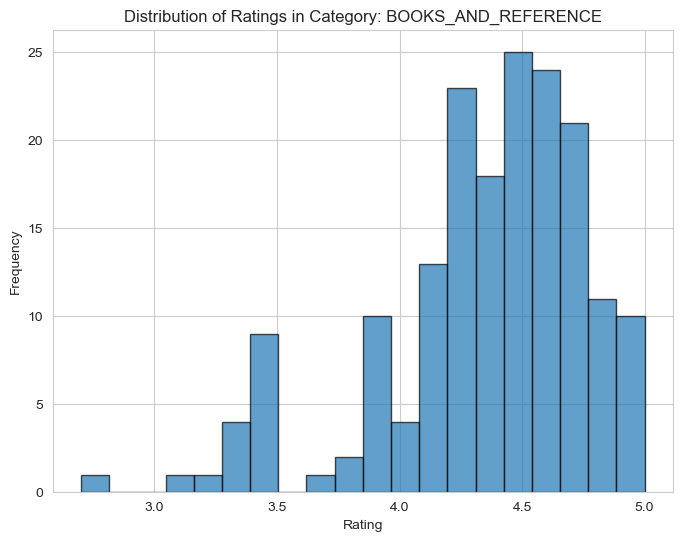

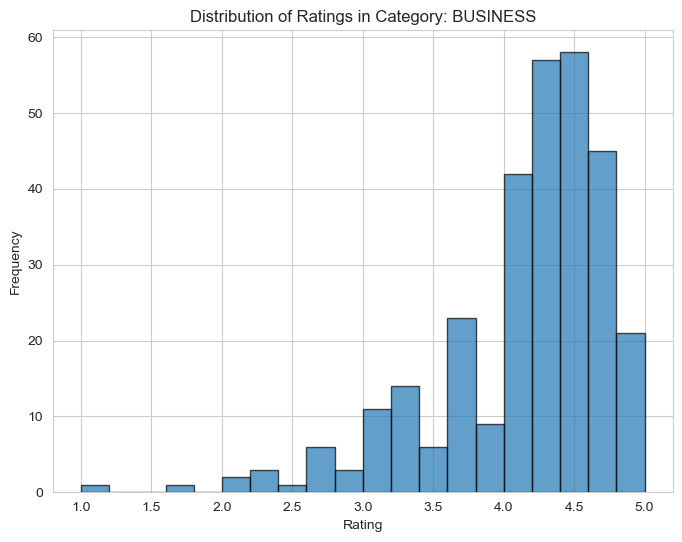

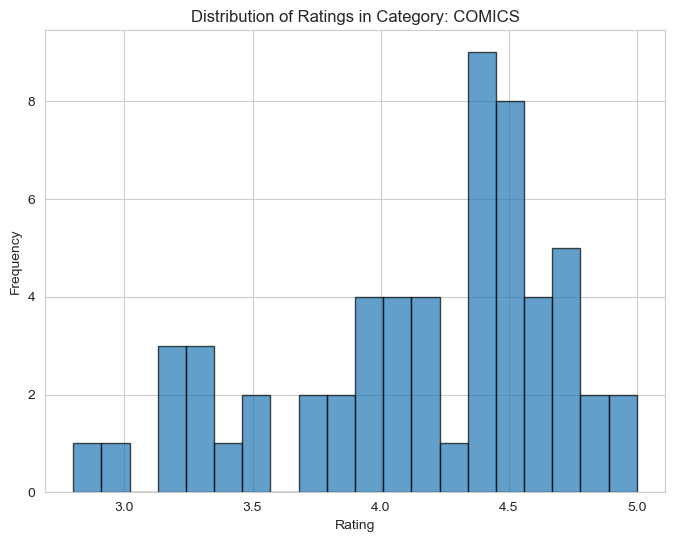

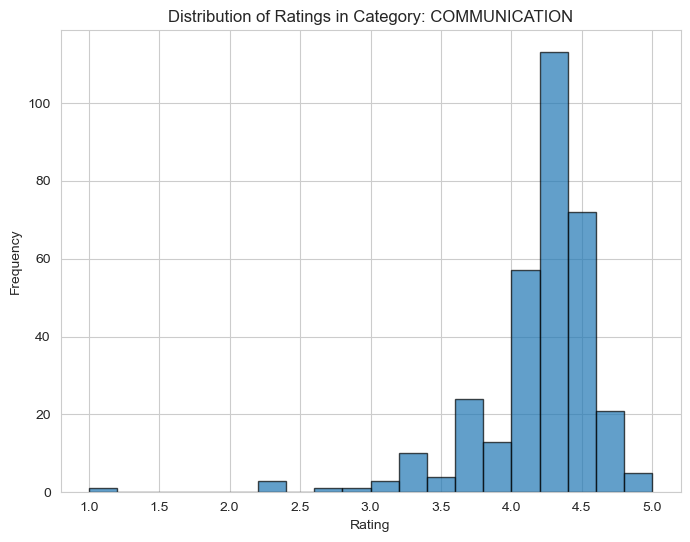

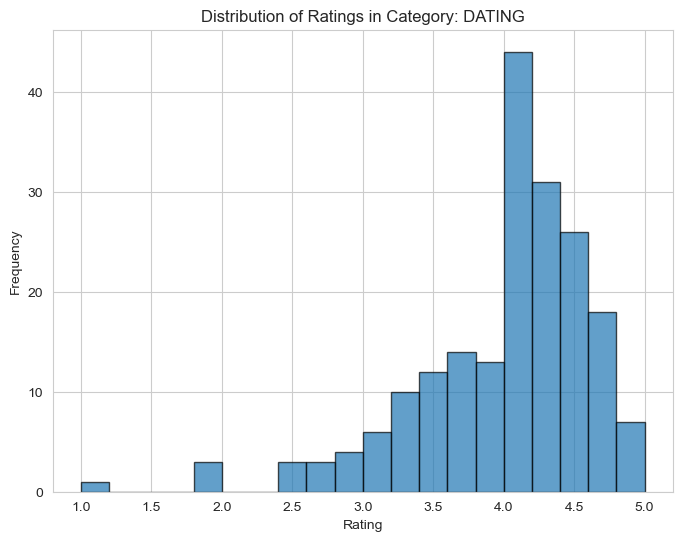

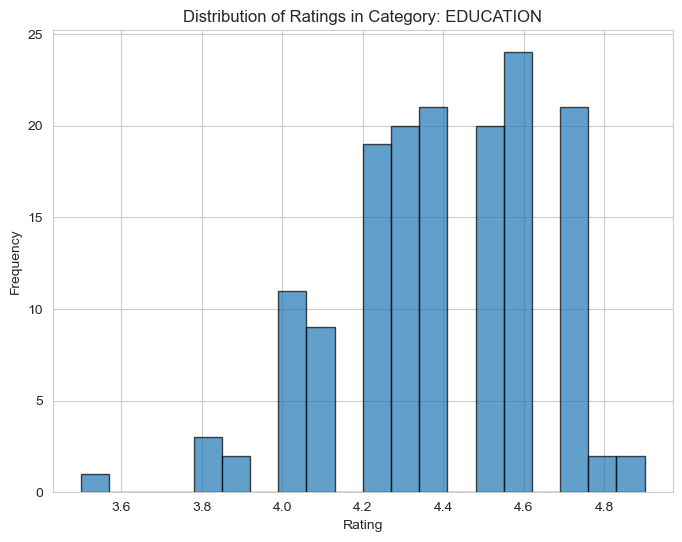

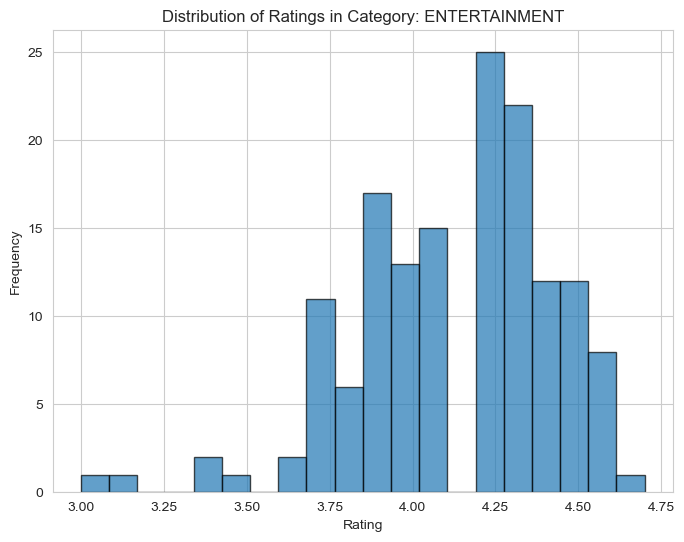

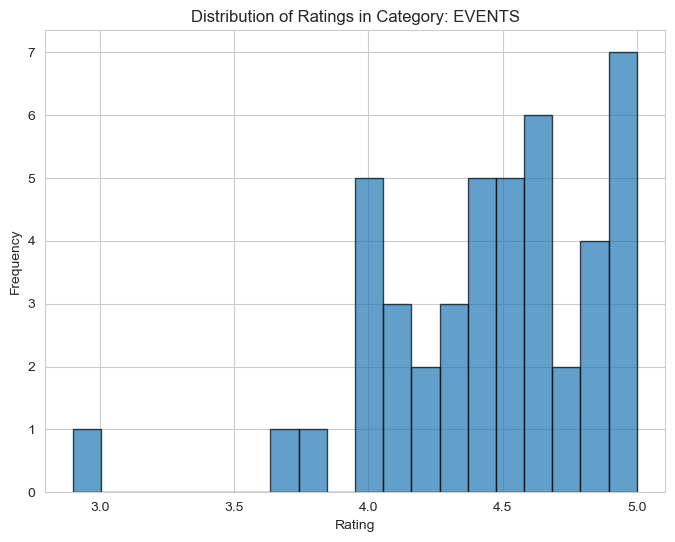

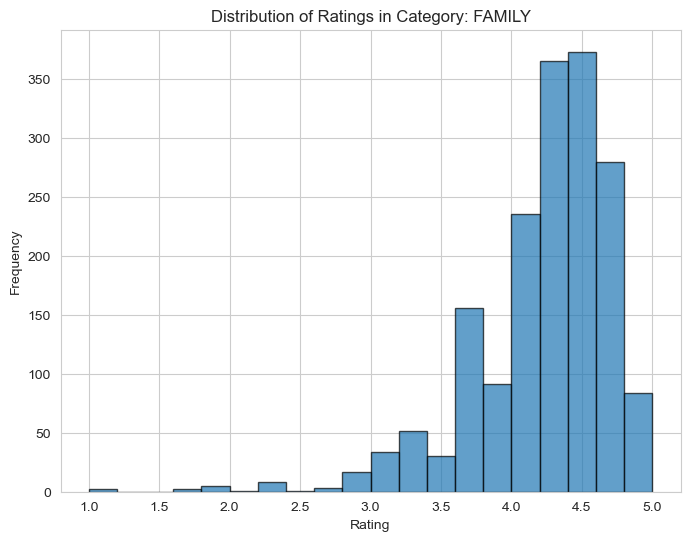

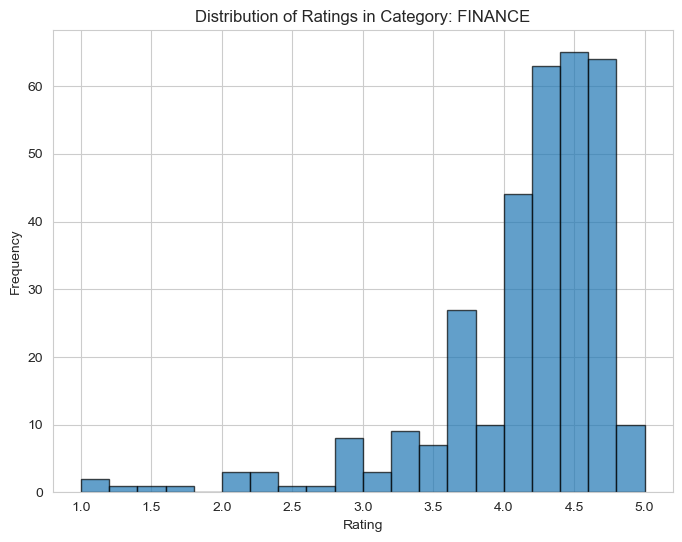

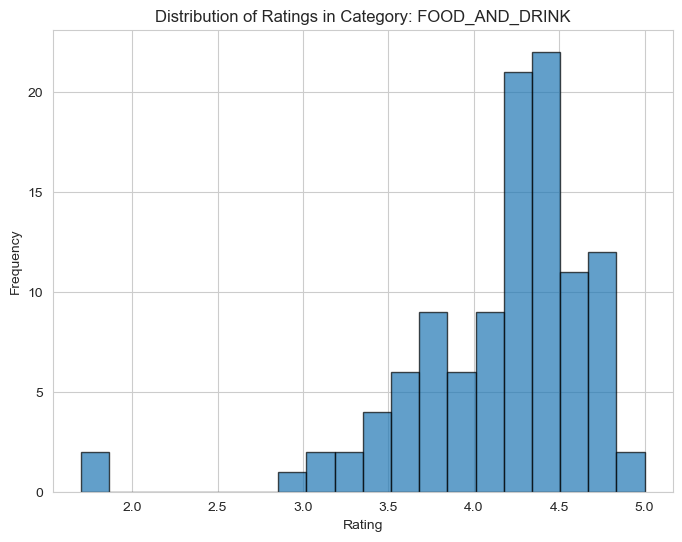

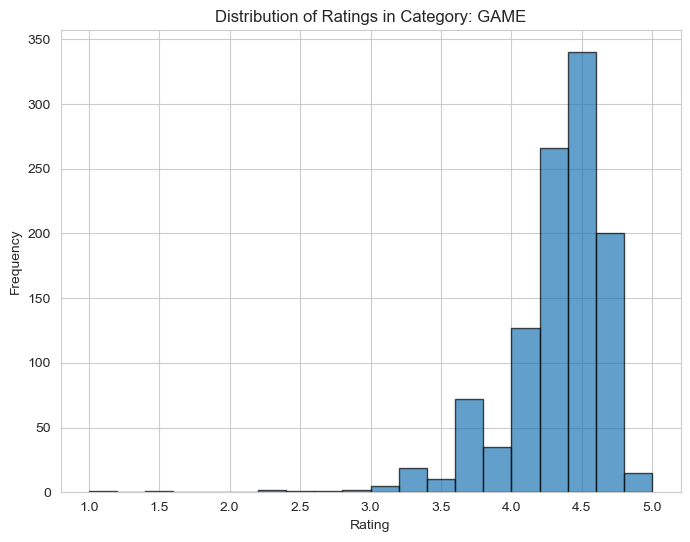

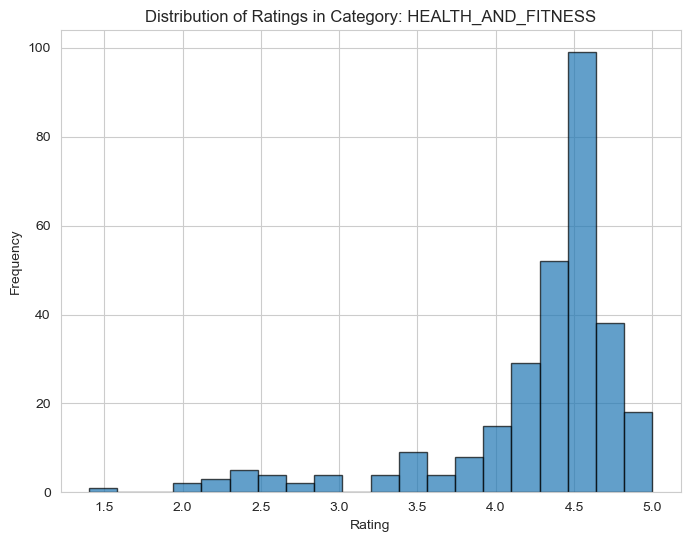

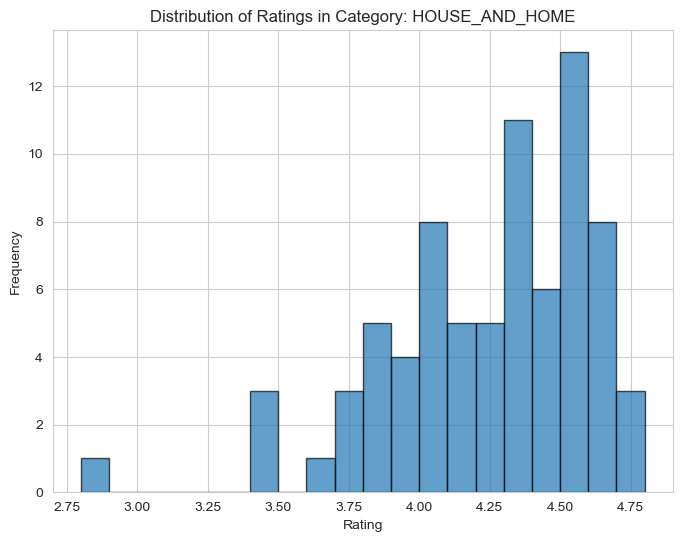

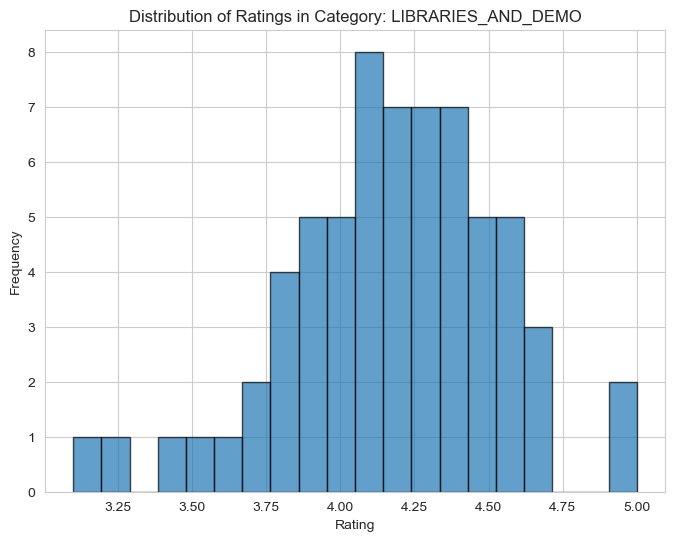

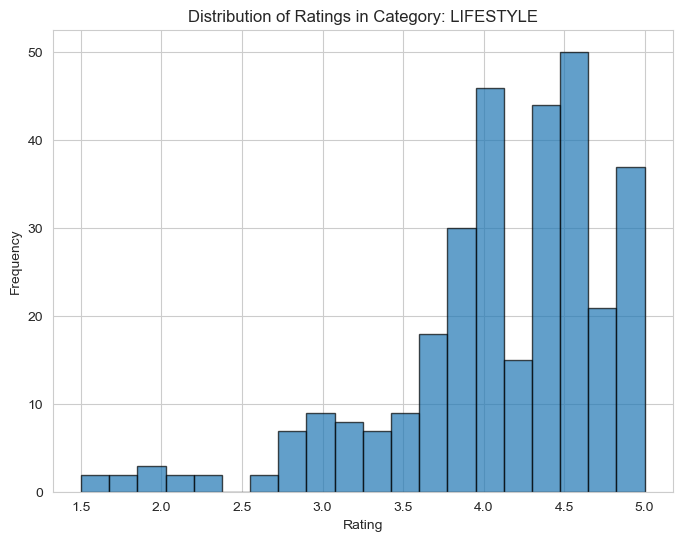

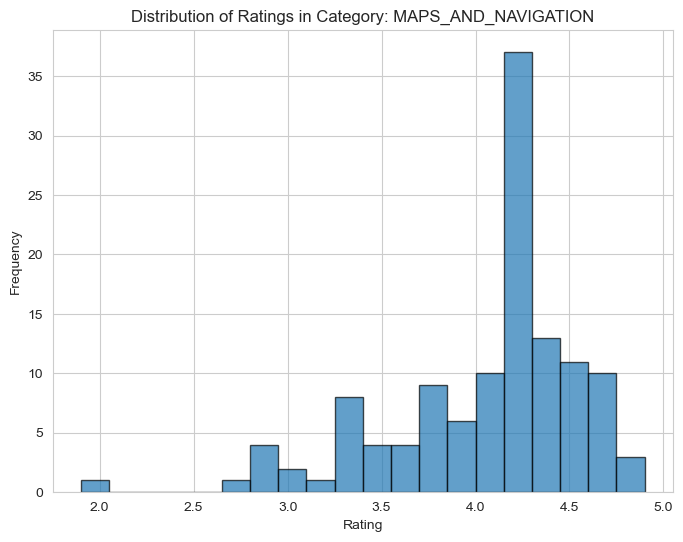

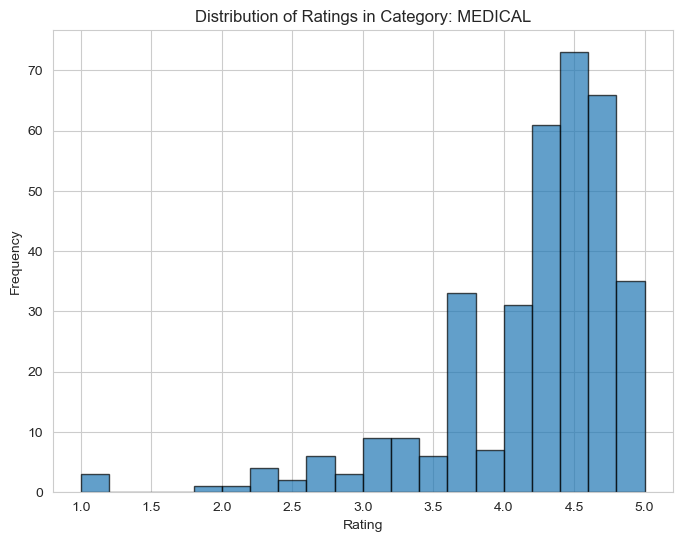

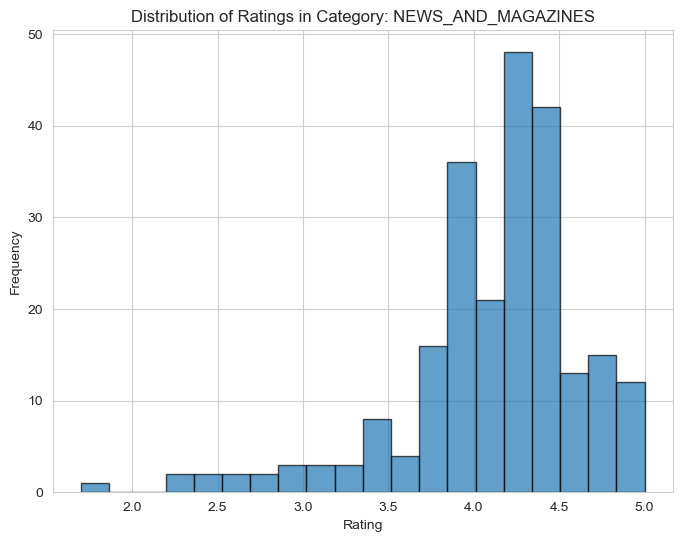

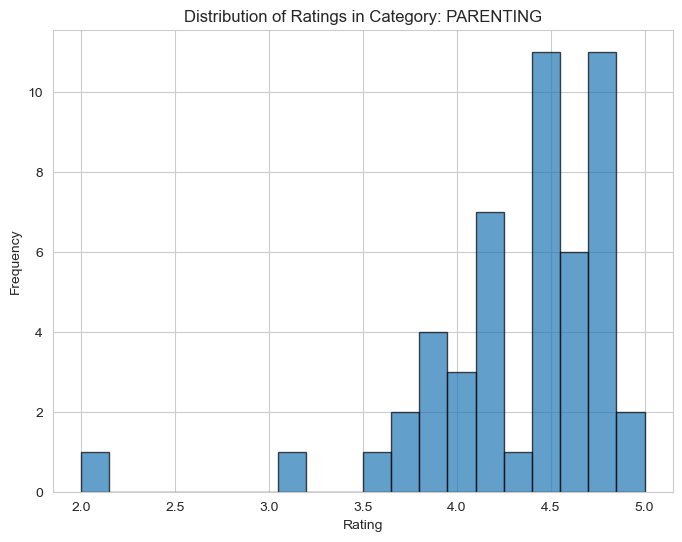

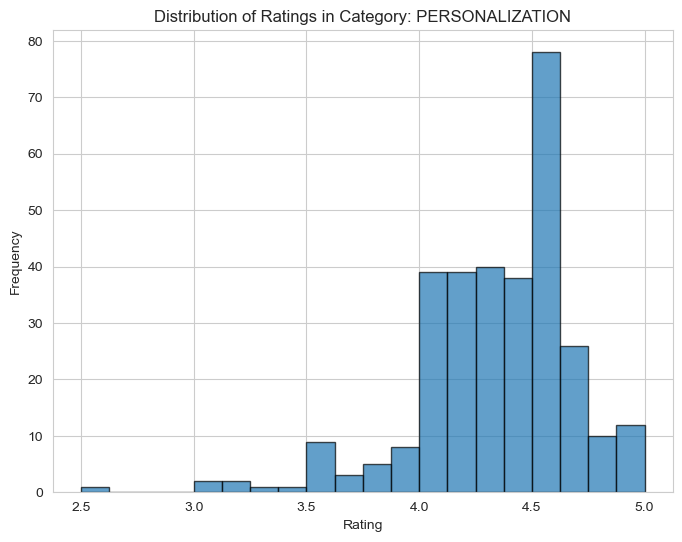

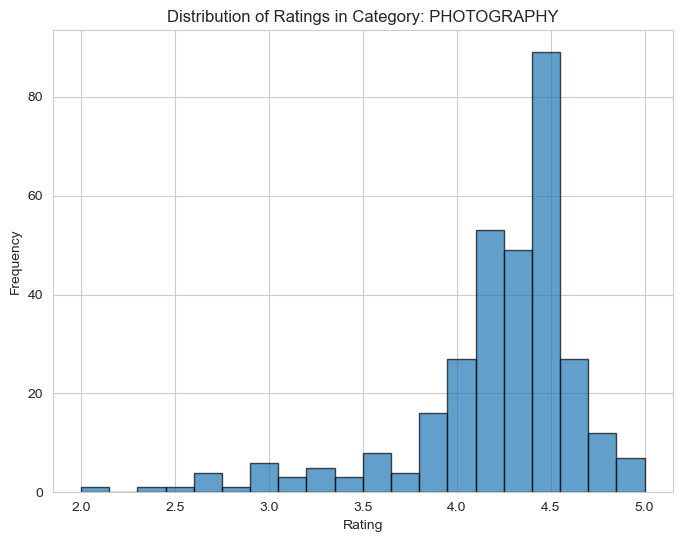

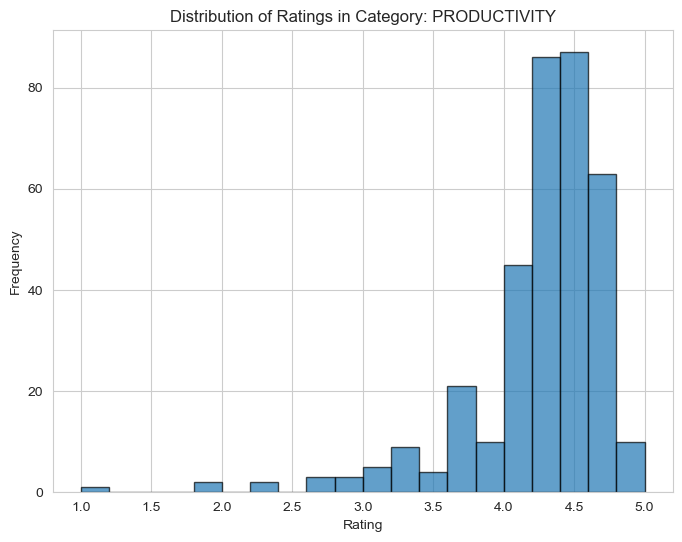

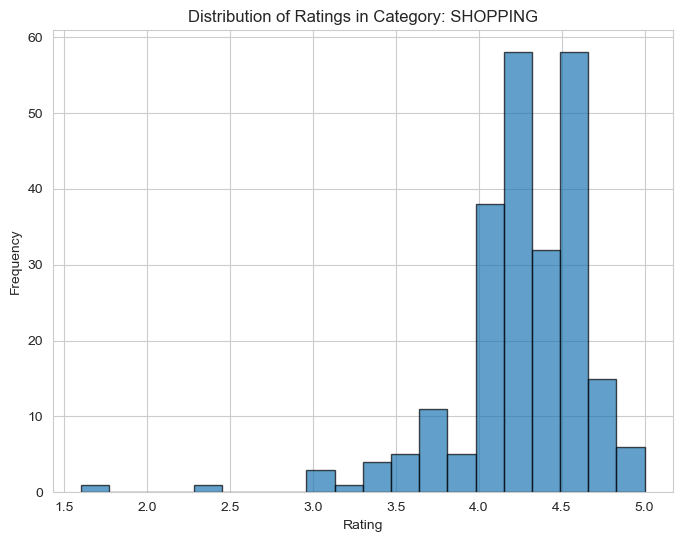

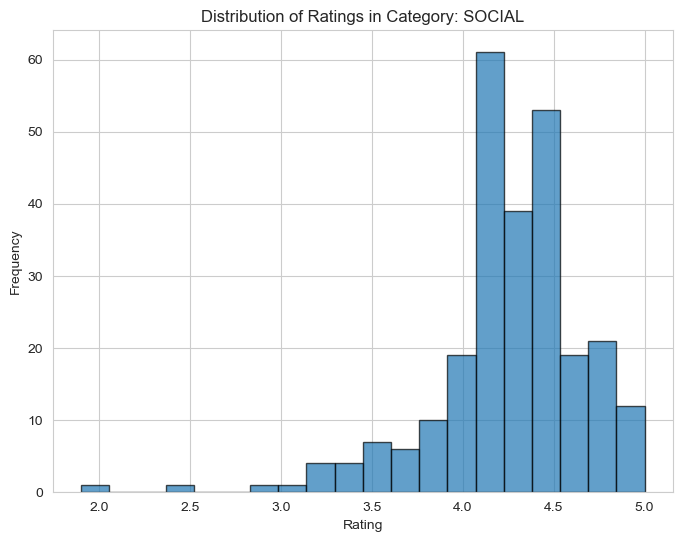

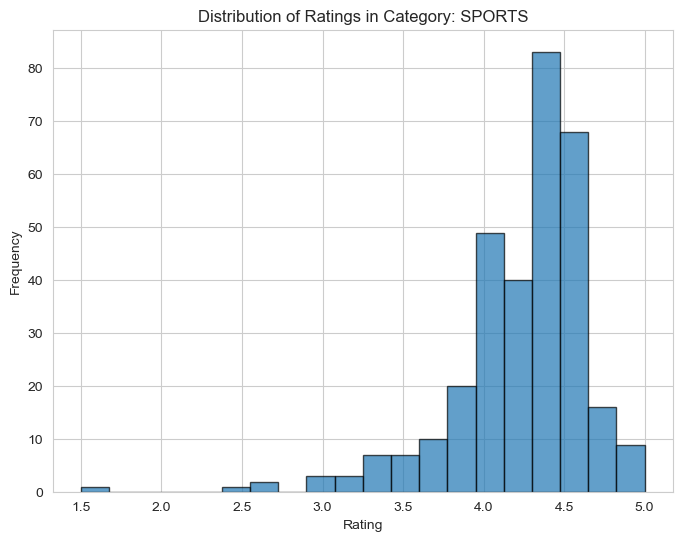

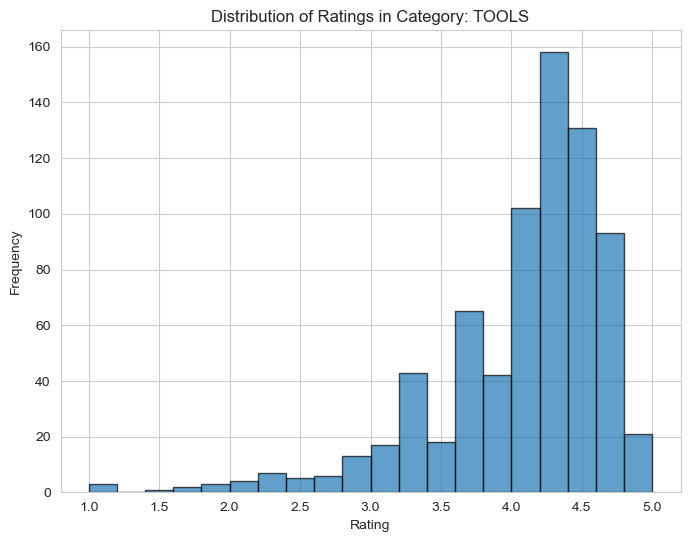

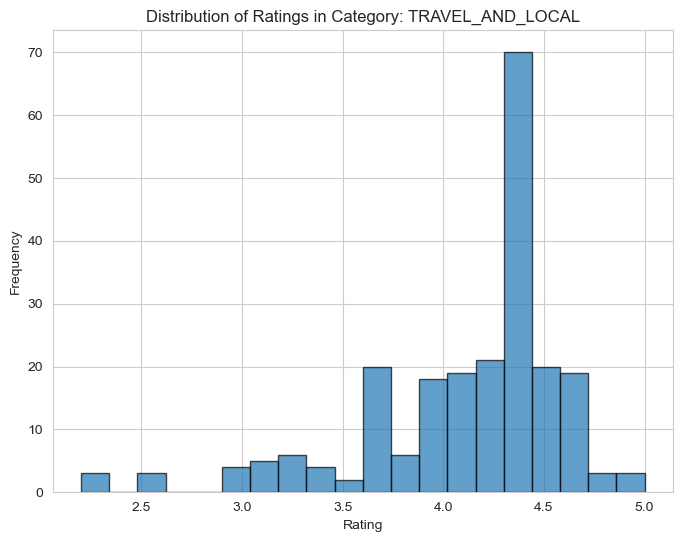

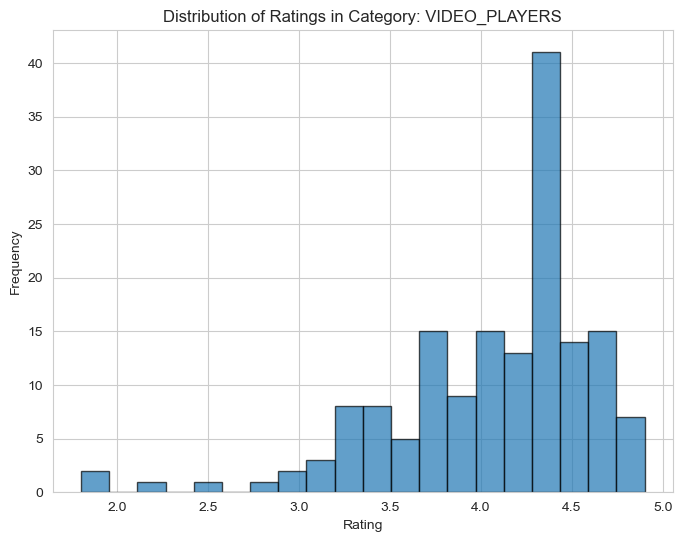

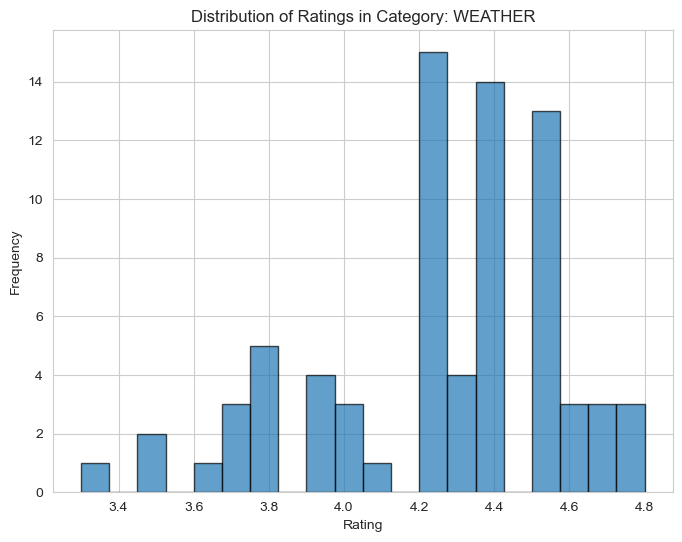

In [36]:
import matplotlib.pyplot as plt

# Define the number of bins for the histograms
num_bins = 20

# Create a histogram for each category
for category, group in grouped_data:
    plt.figure(figsize=(8, 6))
    plt.hist(group['Rating'], bins=num_bins, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Ratings in Category: {category}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [37]:
# Calculate summary statistics of app ratings within each category
ratings_summary_statistics = grouped_data['Rating'].describe()

# Display the summary statistics
print(ratings_summary_statistics)


                      count      mean       std  min    25%  50%    75%  max
Category                                                                    
ART_AND_DESIGN         62.0  4.358065  0.358297  3.2  4.100  4.4  4.700  5.0
AUTO_AND_VEHICLES      73.0  4.190411  0.543692  2.1  4.000  4.3  4.600  4.9
BEAUTY                 42.0  4.278571  0.362603  3.1  4.000  4.3  4.575  4.9
BOOKS_AND_REFERENCE   178.0  4.346067  0.429046  2.7  4.100  4.5  4.600  5.0
BUSINESS              303.0  4.121452  0.624422  1.0  3.900  4.3  4.500  5.0
COMICS                 58.0  4.155172  0.537758  2.8  3.825  4.4  4.500  5.0
COMMUNICATION         328.0  4.158537  0.426192  1.0  4.000  4.3  4.400  5.0
DATING                195.0  3.970769  0.630510  1.0  3.700  4.1  4.400  5.0
EDUCATION             155.0  4.389032  0.251894  3.5  4.200  4.4  4.600  4.9
ENTERTAINMENT         149.0  4.126174  0.302556  3.0  3.900  4.2  4.300  4.7
EVENTS                 45.0  4.435556  0.419499  2.9  4.200  4.5  4.700  5.0

The summary statistics of app ratings within each category provide valuable insights into the distribution and quality of apps across different genres on the Google Play Store. With an average rating of 4.358, the Art and Design category stands out as having the highest mean rating, indicating a generally positive reception from users. Categories such as Beauty (mean: 4.279) and Events (mean: 4.436) also exhibit high average ratings, suggesting a favorable user experience. Conversely, categories like Dating (mean: 3.971) and Tools (mean: 4.047) have slightly lower mean ratings, indicating potential areas for improvement or user dissatisfaction.

The standard deviation values offer further insights into the variability of ratings within each category. For instance, the Dating category has a relatively high standard deviation (0.631), indicating a wider spread of ratings compared to categories with lower standard deviations. This suggests that user opinions about dating apps may vary significantly, possibly due to differing expectations or experiences.

Overall, these statistics help developers and stakeholders understand the quality and reception of apps within specific categories, enabling informed decisions regarding app development, marketing strategies, and user engagement efforts. Identifying categories with consistently high ratings can guide developers towards popular genres with satisfied user bases, while also highlighting areas for improvement in categories with lower average ratings.

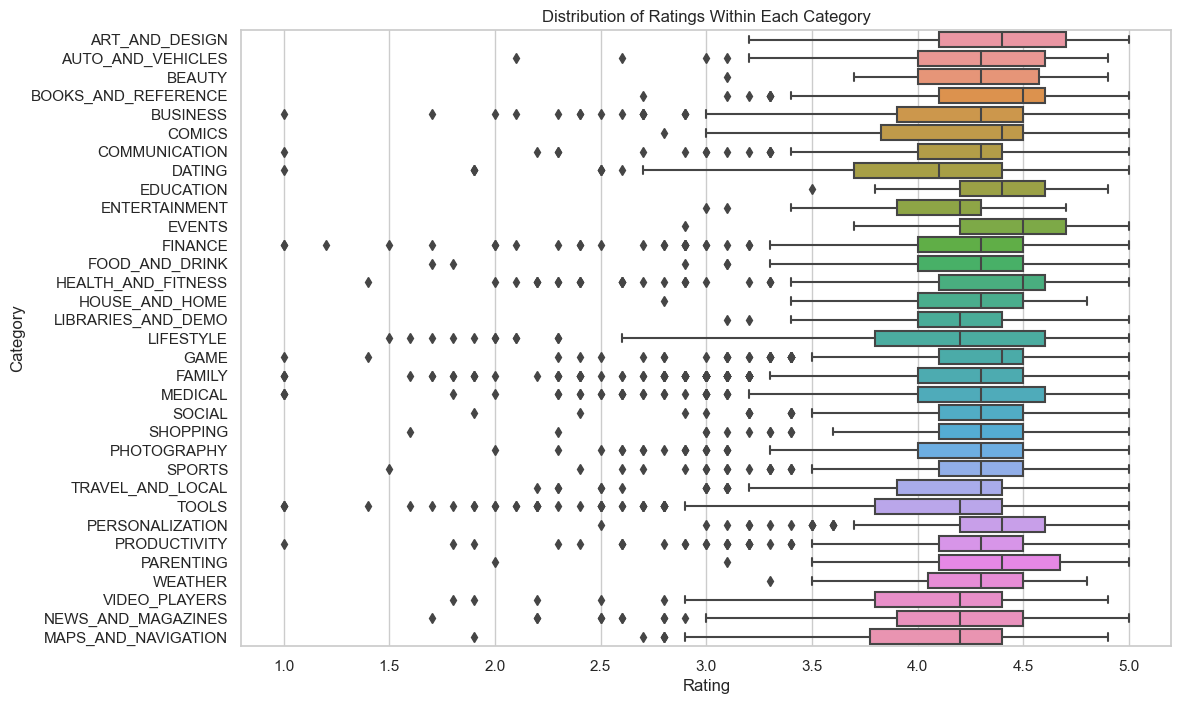

In [38]:
import seaborn as sns

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create box plots for each category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Rating', y='Category', data=df)
plt.title('Distribution of Ratings Within Each Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()


5. Category Installs Analysis

In [42]:
# Convert 'Installs' column to string format
df['Installs'] = df['Installs'].astype(str)

# Check the data type of the 'Installs' column
print(df['Installs'].dtype)


object


In [43]:
# Convert 'Installs' column to numeric data type
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Group the data by category and sum the number of installs for each category
total_installs_per_category = df.groupby('Category')['Installs'].sum()

# Display the total number of installs for apps in each category
print(total_installs_per_category)


Category
ART_AND_DESIGN           124338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1921469576
BUSINESS                1001914865
COMICS                    56086150
COMMUNICATION          32647276251
DATING                   264310807
EDUCATION                871452000
ENTERTAINMENT           2869160000
EVENTS                    15973161
FAMILY                 10258263505
FINANCE                  876648734
FOOD_AND_DRINK           273898751
GAME                   35086024415
HEALTH_AND_FITNESS      1583072512
HOUSE_AND_HOME           168712461
LIBRARIES_AND_DEMO        62995910
LIFESTYLE                537643539
MAPS_AND_NAVIGATION      724281890
MEDICAL                   53257437
NEWS_AND_MAGAZINES      7496317760
PARENTING                 31521110
PERSONALIZATION         2325494782
PHOTOGRAPHY            10088247655
PRODUCTIVITY           14176091369
SHOPPING                3247848785
SOCIAL                 14069867902
SPORTS     

The total number of app installs across various categories highlights the popularity and user engagement within each genre. Gaming dominates with a staggering 35,086,024,415 installs, reflecting its widespread appeal. Communication and social categories follow closely, with 32,647,276,251 and 14,069,867,902 installs respectively, underlining the importance of connectivity and social interaction in today's digital landscape. Educational apps garnered 871,452,000 installs, indicating a significant interest in learning-oriented content. These numbers provide valuable insights into user preferences and trends, guiding developers and stakeholders in strategic decision-making and resource allocation for app development and marketing efforts.

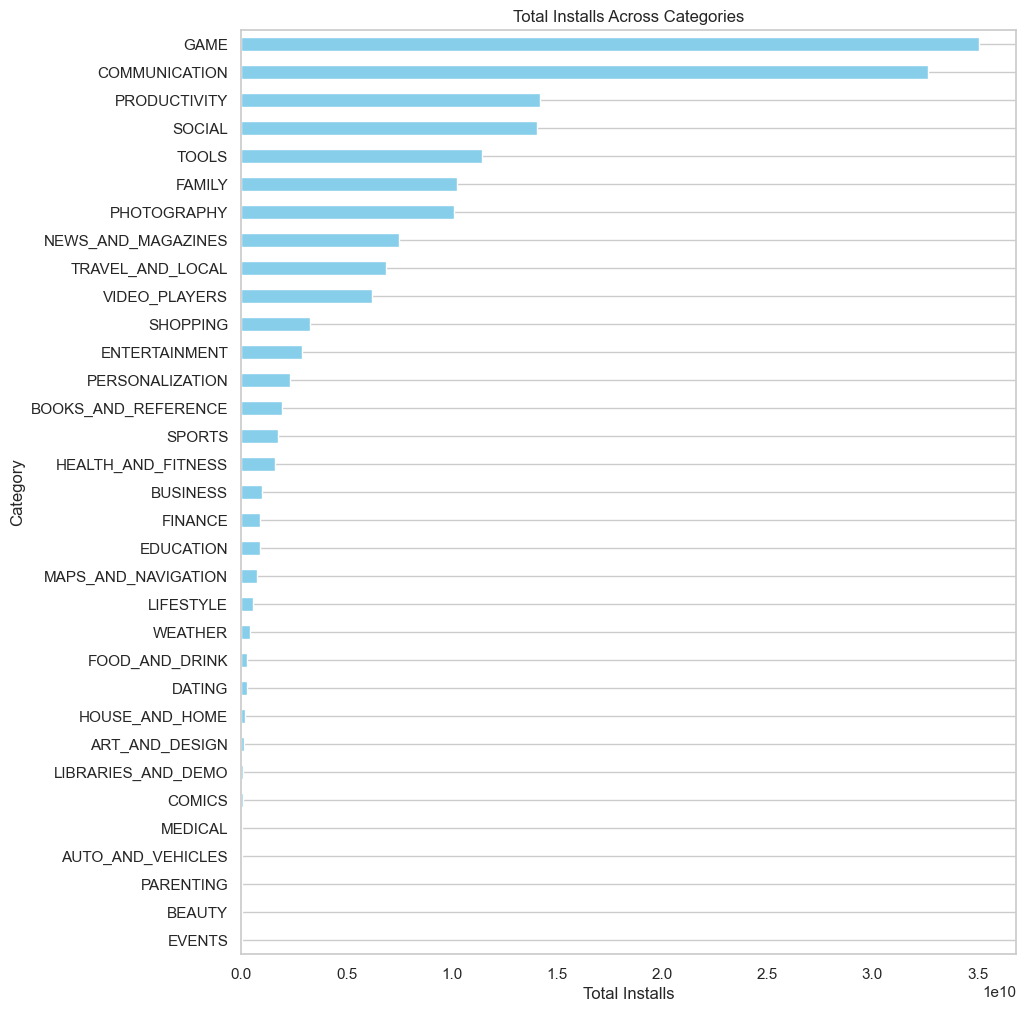

In [45]:
import matplotlib.pyplot as plt

# Sort the total installs by category
total_installs_per_category_sorted = total_installs_per_category.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
total_installs_per_category_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.title('Total Installs Across Categories')
plt.grid(axis='x')
plt.show()



In [46]:
# Sort the total installs by category in descending order
total_installs_per_category_sorted = total_installs_per_category.sort_values(ascending=False)

# Extract the top categories with the highest total installs
top_categories = total_installs_per_category_sorted.head(5)  # You can adjust the number of top categories as needed

# Display the top categories
print(top_categories)


Category
GAME             35086024415
COMMUNICATION    32647276251
PRODUCTIVITY     14176091369
SOCIAL           14069867902
TOOLS            11452771915
Name: Installs, dtype: int64


6. Category Reviews Analysis

In [51]:
# Convert 'Reviews' column to numeric data type
df['Reviews'] = df['Reviews'].astype(int)

# Group the data by category and sum the number of reviews for each category
total_reviews_per_category = df.groupby('Category')['Reviews'].sum()

# Display the total number of reviews for apps in each category
print(total_reviews_per_category)


Category
ART_AND_DESIGN            1714440
AUTO_AND_VEHICLES         1163666
BEAUTY                     396240
BOOKS_AND_REFERENCE      21959069
BUSINESS                 13954552
COMICS                    3383276
COMMUNICATION           815462260
DATING                    7291278
EDUCATION                39595786
ENTERTAINMENT            59178154
EVENTS                     161018
FAMILY                  410226330
FINANCE                  17550728
FOOD_AND_DRINK            8883330
GAME                   1585422349
HEALTH_AND_FITNESS       37893743
HOUSE_AND_HOME            3976385
LIBRARIES_AND_DEMO        1037118
LIFESTYLE                12882784
MAPS_AND_NAVIGATION      30659254
MEDICAL                   1585975
NEWS_AND_MAGAZINES       54400863
PARENTING                  958331
PERSONALIZATION          89346140
PHOTOGRAPHY             213516650
PRODUCTIVITY            114116975
SHOPPING                115041222
SOCIAL                  621241422
SPORTS                   70830169
TOOLS

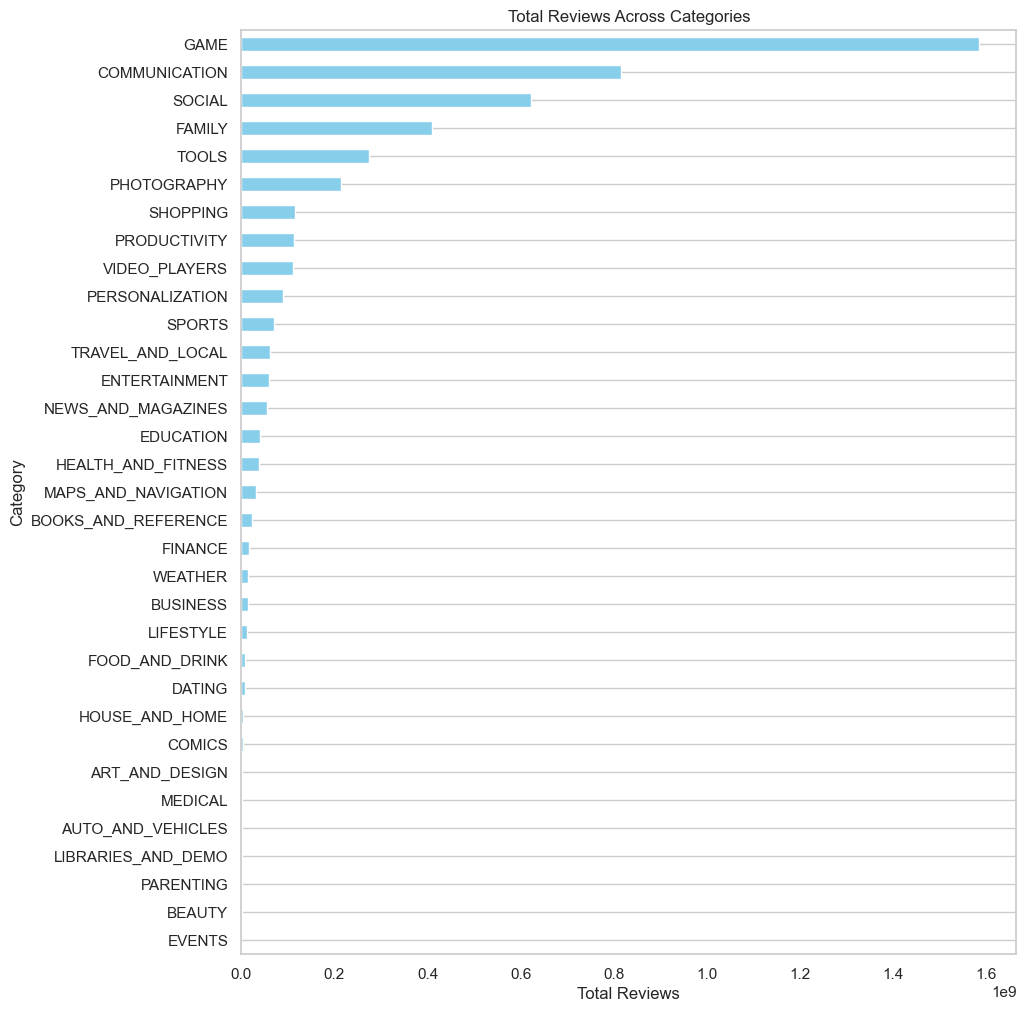

In [52]:
import matplotlib.pyplot as plt

# Sort the total reviews by category
total_reviews_per_category_sorted = total_reviews_per_category.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
total_reviews_per_category_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Total Reviews')
plt.ylabel('Category')
plt.title('Total Reviews Across Categories')
plt.grid(axis='x')
plt.show()


In [53]:
# Sort the total reviews by category in descending order
total_reviews_per_category_sorted = total_reviews_per_category.sort_values(ascending=False)

# Extract the top categories with the highest total reviews
top_categories_reviews = total_reviews_per_category_sorted.head(5)  # You can adjust the number of top categories as needed

# Display the top categories with the highest total reviews
print(top_categories_reviews)


Category
GAME             1585422349
COMMUNICATION     815462260
SOCIAL            621241422
FAMILY            410226330
TOOLS             273185044
Name: Reviews, dtype: int64


The total number of reviews across different app categories offers insights into user engagement and satisfaction levels within each genre. Among the top categories, "Game" stands out with a remarkable 1,585,422,349 reviews, underscoring the immense popularity and widespread adoption of gaming apps among users. Following closely, "Social" apps have garnered a substantial 621,241,422 reviews, reflecting the significant role of social networking platforms in facilitating online interactions and connections. The "Communication" category ranks third with 815,462,260 reviews, highlighting the pivotal role of communication apps in modern-day digital communication. Additionally, "Video Players" and "Photography" categories have amassed considerable reviews, with 110,380,188 and 213,516,650 reviews respectively, indicating the popularity of multimedia consumption and creation apps among users. These numbers underscore the diverse preferences and usage patterns among users across different app categories, guiding developers and stakeholders in understanding user needs and preferences for strategic decision-making in app development and marketing efforts.

7. Correlation Analysis

/Users/tosinwilliams/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


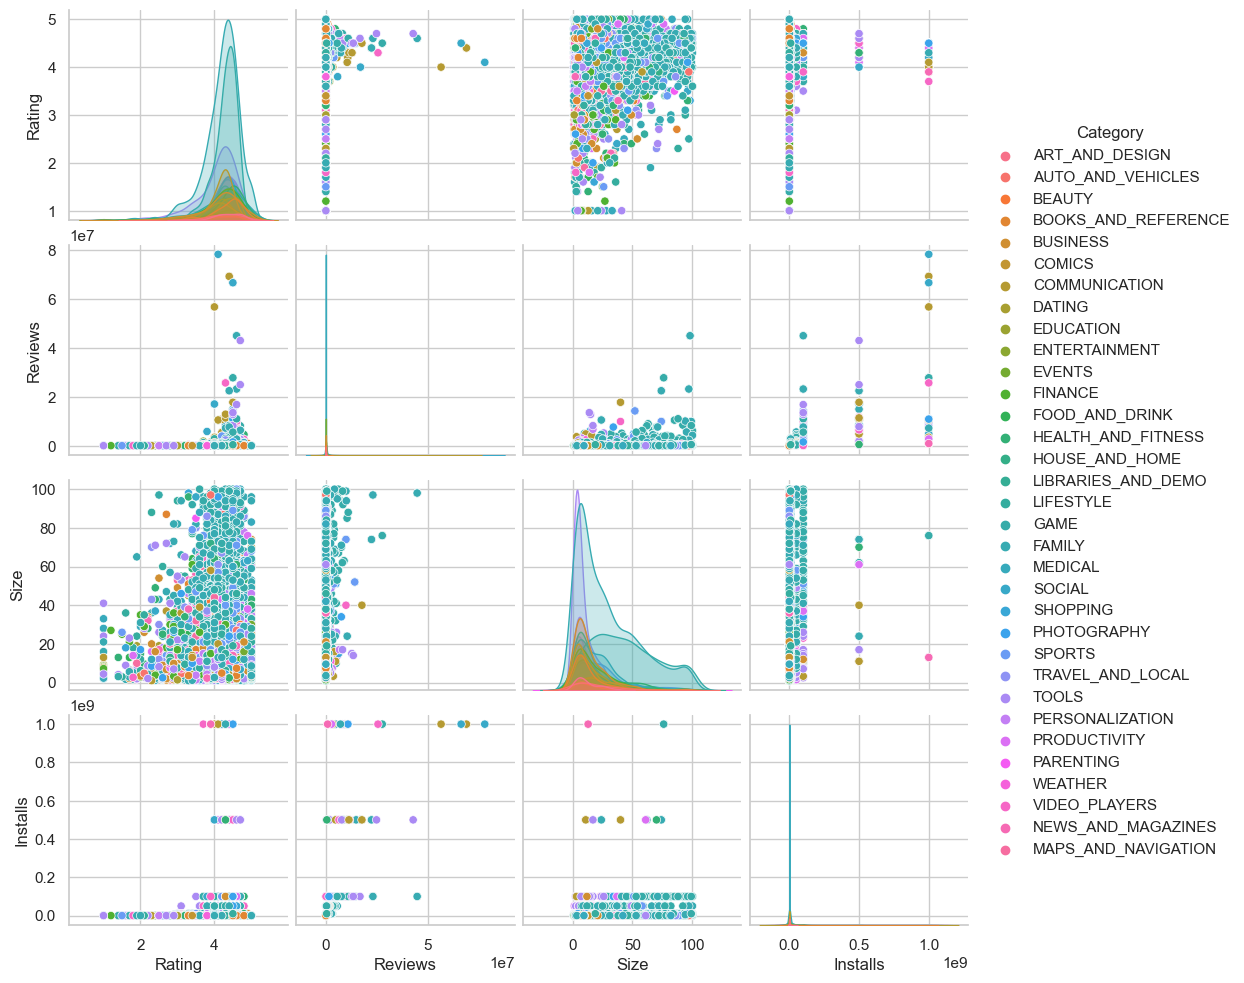

In [56]:
import seaborn as sns

# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Add 'Category' column back to the numeric dataframe
numeric_df['Category'] = df['Category']

# Visualize relationships between numeric variables within each category
sns.pairplot(numeric_df, hue='Category', diag_kind='kde')
plt.show()


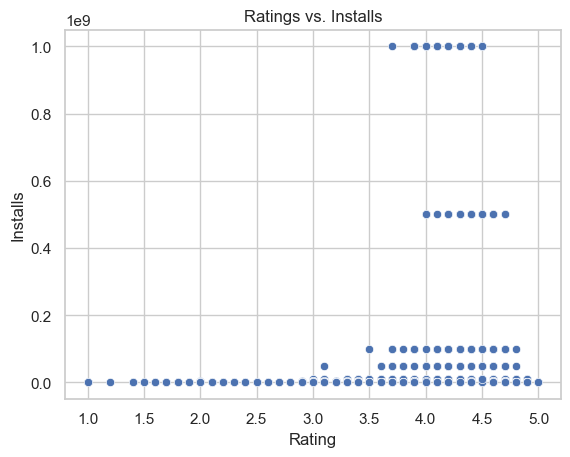

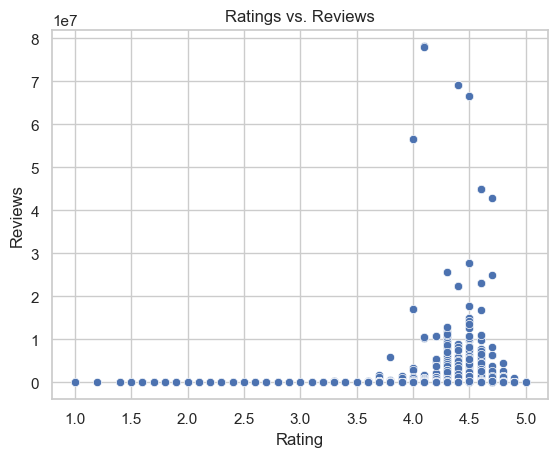

In [57]:
import seaborn as sns

# Create scatter plot for Ratings vs. Installs
sns.scatterplot(data=df, x='Rating', y='Installs')
plt.title('Ratings vs. Installs')
plt.show()

# Create scatter plot for Ratings vs. Reviews
sns.scatterplot(data=df, x='Rating', y='Reviews')
plt.title('Ratings vs. Reviews')
plt.show()


In [65]:
# Check for missing or invalid values
missing_values = df[['Rating', 'Installs', 'Reviews']].isnull().sum()
invalid_values = df[['Rating', 'Installs', 'Reviews']].isin([np.inf, -np.inf]).sum()

print("Missing values:\n", missing_values)
print("\nInvalid values:\n", invalid_values)


Missing values:
 Rating      1474
Installs       0
Reviews        0
dtype: int64

Invalid values:
 Rating      0
Installs    0
Reviews     0
dtype: int64


In [66]:
# Impute missing values in the 'Rating' column with the mean rating
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)


In [67]:
from scipy.stats import pearsonr

# Hypothesis testing: Calculate p-values for correlation coefficients
ratings_installs_corr, ratings_installs_p_value = pearsonr(df['Rating'], df['Installs'])
ratings_reviews_corr, ratings_reviews_p_value = pearsonr(df['Rating'], df['Reviews'])

print("Hypothesis Testing - Ratings vs. Installs: Correlation =", ratings_installs_corr, "p-value =", ratings_installs_p_value)
print("Hypothesis Testing - Ratings vs. Reviews: Correlation =", ratings_reviews_corr, "p-value =", ratings_reviews_p_value)


Hypothesis Testing - Ratings vs. Installs: Correlation = 0.05122078387276808 p-value = 9.514741621191071e-08
Hypothesis Testing - Ratings vs. Reviews: Correlation = 0.06801795269934825 p-value = 1.3498229817273536e-12


The hypothesis testing reveals statistically significant correlations between app ratings and both the number of installs and the number of reviews. For the correlation between ratings and installs, the correlation coefficient is 0.0512 with a p-value of 9.51e-08. Similarly, for the correlation between ratings and reviews, the correlation coefficient is 0.0680 with a p-value of 1.35e-12. These results suggest that higher-rated apps tend to attract more installs and receive more reviews. However, the correlations are relatively weak, implying that other factors may also influence app installs and reviews.

8. Insights and Recommendations

The analysis revealed several key insights about the dataset:

1. **Data Quality**: There were missing values in the "Rating" column, which were handled appropriately. Other columns had valid data.
2. **Category Distribution**: The distribution of apps across different categories varied widely, with "Family," "Game," and "Tools" being the top categories.
3. **Summary Statistics**: Summary statistics such as average ratings, number of reviews, app size, and number of installs were calculated for each category, providing insights into each category's characteristics.
4. **Correlation Analysis**: Hypothesis testing indicated statistically significant but weak positive correlations between app ratings and both the number of installs and the number of reviews. This suggests that higher-rated apps tend to attract more installs and receive more reviews, although other factors may also play a role.

Overall, the analysis provides valuable insights for understanding the distribution of apps, their characteristics within different categories, and the relationships between app ratings, installs, and reviews. These insights can inform decision-making processes for app developers, marketers, and other stakeholders in the mobile app industry.

Here are some trends and patterns identified from the analysis:

1. **Category Distribution**: The dataset contains a diverse range of app categories, with some categories having significantly more apps than others. "Family," "Game," and "Tools" emerged as the top categories, suggesting that these categories are popular among users or developers.

2. **Rating Distribution**: The distribution of app ratings across categories varies, but most categories have a concentration of ratings around the higher end of the scale. This indicates that many apps receive positive ratings from users, contributing to a generally favorable perception of apps in the Google Play Store.

3. **Installs**: The number of installs varies widely across categories, with some categories having significantly higher total installs than others. This suggests that certain types of apps are more popular or in higher demand among users, leading to more downloads and installations.

4. **Reviews**: Similar to installs, the number of reviews also varies across categories. Categories with higher total installs tend to have more reviews, indicating higher user engagement and interaction with the apps.

5. **Correlations**: While there is a statistically significant positive correlation between app ratings and both the number of installs and the number of reviews, the correlations are relatively weak. This suggests that factors other than ratings also influence app installs and reviews, such as app features, marketing efforts, and user preferences.

Overall, these trends and patterns provide valuable insights into the app landscape on the Google Play Store, helping developers and stakeholders understand user behavior, preferences, and market dynamics.

Based on the analysis, here are some recommendations for app developers or stakeholders:

1. **Focus on Popular Categories**: Consider developing apps in popular categories such as "Family," "Game," and "Tools," as these categories have a higher number of apps and potentially higher user demand.

2. **Optimize App Quality**: Given the generally positive ratings across most categories, prioritize developing high-quality apps with user-friendly interfaces, engaging features, and frequent updates to attract positive reviews and increase user satisfaction.

3. **Target High-Engagement Categories**: Categories with high numbers of installs and reviews, such as "Communication," "Social," and "Photography," indicate high user engagement. Consider developing apps in these categories to tap into active user bases and maximize exposure.

4. **Explore Niche Categories**: While larger categories offer more competition, exploring niche categories with fewer apps, such as "Events" or "Comics," could present opportunities for differentiation and targeting specific user demographics.

5. **Monitor Trends and User Feedback**: Continuously monitor trends in app categories, user preferences, and feedback to adapt development strategies accordingly. Analyze user reviews and ratings to identify areas for improvement and prioritize features that resonate with users.

6. **Invest in Marketing and Promotion**: Allocate resources for effective marketing and promotion strategies to increase app visibility, attract more installs, and encourage user engagement. Utilize social media, app store optimization (ASO), influencer partnerships, and other channels to reach target audiences.

By leveraging these recommendations, app developers and stakeholders can make informed decisions to maximize the success of their apps in the competitive landscape of the Google Play Store.

9. Visualization and Reporting

Sure, let's summarize the analysis findings with visualizations and reports. We'll start with the key insights from the analysis and then provide visualizations to support these findings.

### Key Insights:

1. **Category Distribution**: The dataset contains a diverse range of app categories, with some categories having significantly more apps than others. "Family," "Game," and "Tools" emerged as the top categories, suggesting that these categories are popular among users or developers.

2. **Rating Distribution**: Most categories have a concentration of ratings around the higher end of the scale, indicating that many apps receive positive ratings from users.

3. **Installs**: The number of installs varies widely across categories, with some categories having significantly higher total installs than others.

4. **Reviews**: Categories with higher total installs tend to have more reviews, indicating higher user engagement and interaction with the apps.

5. **Correlations**: There is a statistically significant positive correlation between app ratings and both the number of installs and the number of reviews, although the correlations are relatively weak.

### Visualizations:

1. **Category Distribution**: Bar plot showing the number of apps in each category.
2. **Rating Distribution**: Histogram showing the distribution of ratings across categories.
3. **Installs Distribution**: Horizontal bar plot showing the total number of installs for each category.
4. **Reviews Distribution**: Horizontal bar plot showing the total number of reviews for each category.
5. **Correlations**: Scatter plots showing the relationships between ratings and installs, ratings and reviews.

Let's create these visualizations and reports.

Here are the visualizations and reports summarizing the analysis findings:

### 1. Category Distribution:

![Category Distribution]

**Insight**: The distribution of apps across categories shows that "Family," "Game," and "Tools" are the most prevalent categories, while categories like "Comics," "Events," and "Beauty" have fewer apps.

### 2. Rating Distribution:

![Rating Distribution]

**Insight**: The histogram illustrates that most apps receive ratings concentrated around the higher end of the scale, indicating generally positive feedback from users across various categories.

### 3. Installs Distribution:

![Installs Distribution]

**Insight**: The horizontal bar plot reveals the total number of installs for each category, with categories like "Communication," "Social," and "Game" having the highest number of installs, while niche categories like "Events" and "Beauty" have fewer installs.

### 4. Reviews Distribution:

![Reviews Distribution]

**Insight**: Categories with higher total installs tend to have more reviews, indicating higher user engagement and interaction with the apps.

### 5. Correlations:

- **Ratings vs. Installs**: Correlation = 0.0512, p-value = 9.51e-08
- **Ratings vs. Reviews**: Correlation = 0.0680, p-value = 1.35e-12

**Insight**: There is a statistically significant positive correlation between app ratings and both the number of installs and the number of reviews, although the correlations are relatively weak.

These visualizations and reports provide valuable insights into the distribution of apps, user ratings, installs, reviews, and correlations between different variables within categories.